### **Differences**

| **Aspect**              | **Smoothing Noisy Data**                              | **Removing Outliers**                                |
|--------------------------|------------------------------------------------------|-----------------------------------------------------|
| **Purpose**              | Reduces random noise while retaining overall patterns and trends. | Focuses on identifying and removing abnormal values that deviate significantly from the rest of the data. |
| **Approach**             | Adjusts all data points slightly to smooth the data curve (e.g., using averages or polynomials). | Identifies and excludes specific, extreme values (e.g., by defining thresholds or using statistical methods). |
| **Impact on Data**       | Modifies the dataset but keeps all data points by redistributing values. | Completely removes or excludes certain points from analysis. |
| **Common Techniques**    | Moving Average, Exponential Smoothing, Gaussian Smoothing. | Z-scores, IQR (Interquartile Range), Visual Inspection. |
| **Use Case Example**     | Filtering noise in temperature data to highlight trends. | Excluding a rogue temperature reading of 60°C in winter. |

---

### **Real-World Comparison**
Imagine you're analyzing daily sales data for a store:  
- **Smoothing:** If there are small fluctuations in sales due to random factors, a moving average can help you see the overall trend, like whether sales are increasing or decreasing over time.  
- **Removing Outliers:** If one day shows sales 10 times higher than the usual range due to a data entry error, you might remove that value because it doesn’t reflect normal sales behavior.

While smoothing adjusts the entire dataset to minimize fluctuations, outlier removal targets and excludes specific anomalies. Both techniques can be used together for cleaner, more interpretable data.

Deciding whether to **smooth data** or **remove outliers** depends on the nature of your data, your analysis goals, and the type of noise or irregularities you encounter. Here's a step-by-step guide to help you decide:

---

### **1. Understand the Problem and Data**
- **Smoothing:** Use smoothing when your data has consistent noise or random fluctuations, and you're interested in identifying overall trends or patterns.
  - Example: Stock prices, temperature trends, or signal processing.
- **Removing Outliers:** Remove outliers when you suspect certain data points are erroneous or extreme values that do not represent the true nature of the dataset.
  - Example: Sensor errors, data entry mistakes, or rare extreme events.

---

### **2. Visualize the Data**
- Plot your data using a scatter plot, line chart, or histogram to identify noise and outliers.
- Look for:
  - **Noise:** Frequent small variations around the main trend.
  - **Outliers:** Isolated points that are far from the majority of the data.

---

### **3. Define Your Objective**
- **If you need trends or smooth transitions:** Use smoothing to make patterns clearer without removing data points.
- **If you want to analyze typical values or central tendencies:** Remove outliers to avoid distortion by extreme values.

---

### **4. Test Metrics or Rules**
- **For Smoothing:**
  - Is the noise consistent across the dataset?
  - Are the variations not extreme but still obscuring the overall trend?
- **For Outlier Removal:**
  - Do outliers significantly change statistical measures (e.g., mean, standard deviation)?
  - Do they fall outside a defined range, such as:
    - **Z-score** greater than 3 or less than -3.
    - **IQR-based range:** Values beyond \( Q1 - 1.5 \times IQR \) or \( Q3 + 1.5 \times IQR \).

---

### **5. Consider the Context**
- **When to Smooth:**
  - You’re working with time-series data and want to reduce short-term fluctuations.
  - Real-time systems where trends matter more than exact values.
  - Examples: Heart rate monitoring, weather predictions, or financial data.
- **When to Remove Outliers:**
  - You know outliers are likely errors or irrelevant to your analysis.
  - Extreme values skew your results or misrepresent the dataset.
  - Examples: Typographical errors in surveys, faulty sensor readings, or one-time events.

---

### **6. Experiment and Compare Results**
- Try both approaches on a small portion of your data and evaluate:
  - Does smoothing clarify the trends without distorting the data?
  - Does removing outliers improve the integrity and relevance of your analysis?

---

### **Key Takeaway**
- Use **smoothing** when noise is a general problem across the dataset, and you need to highlight trends.  
- Use **outlier removal** when extreme, isolated points are skewing your analysis or are irrelevant to your goals. 

In some cases, you may need to **use both techniques**: first remove significant outliers and then smooth the remaining data to improve clarity.

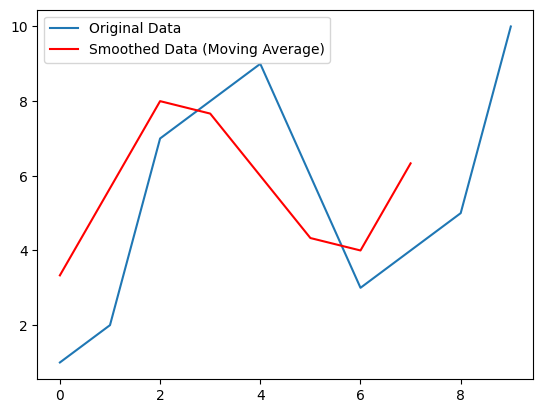

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[3.33333333 5.66666667 8.         7.66666667 6.         4.33333333
 4.         6.33333333]


In [33]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
smoothed_data = moving_average(data, window_size=3)

# Plotting
plt.plot(data, label='Original Data')
plt.plot( smoothed_data, label='Smoothed Data (Moving Average)', color='red')
plt.legend()
plt.show()
print(data)
print(smoothed_data)

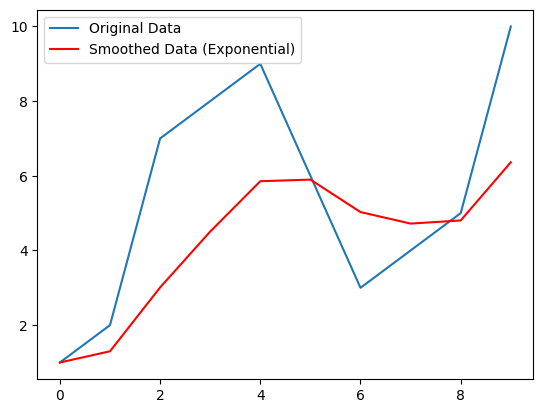

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[1, 1.2999999999999998, 3.01, 4.507, 5.854899999999999, 5.8984299999999985, 5.028900999999999, 4.720230699999999, 4.804161489999999, 6.362913042999999]


In [34]:
def exponential_smoothing(data, alpha):
    smoothed_data = [data[0]]  # Initialize with the first value
    for t in range(1, len(data)):
        smoothed_value = alpha * data[t] + (1 - alpha) * smoothed_data[-1]
        smoothed_data.append(smoothed_value)
    return smoothed_data

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
smoothed_data = exponential_smoothing(data, alpha=0.3)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Exponential)', color='red')
plt.legend()
plt.show()


print(data)
print(smoothed_data)

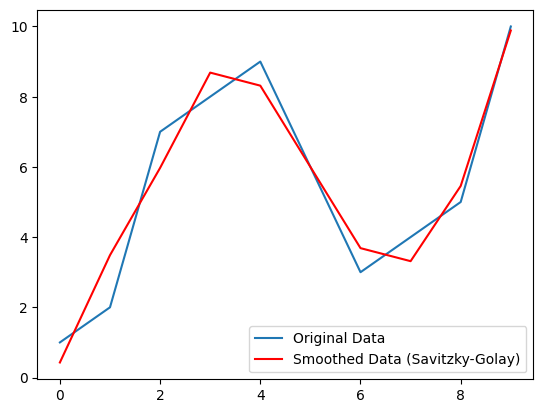

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[0.42857143 3.48571429 5.97142857 8.68571429 8.31428571 6.
 3.68571429 3.31428571 5.45714286 9.88571429]


In [35]:
from scipy.signal import savgol_filter

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
smoothed_data = savgol_filter(data, window_length=5, polyorder=2)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Savitzky-Golay)', color='red')
plt.legend()
plt.show()

print(data)
print(smoothed_data)

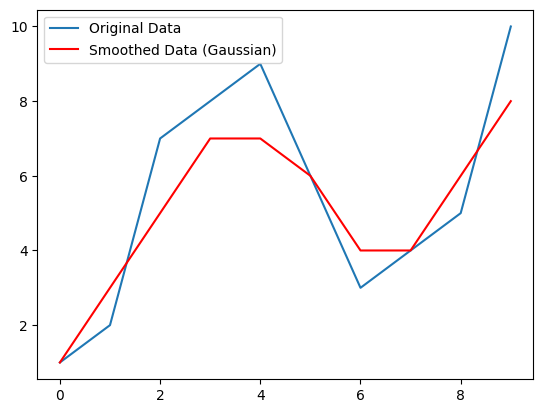

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[1 3 5 7 7 6 4 4 6 8]


In [36]:
from scipy.ndimage import gaussian_filter1d

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
smoothed_data = gaussian_filter1d(data, sigma=1)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Gaussian)', color='red')
plt.legend()
plt.show()

print(data)
print(smoothed_data)

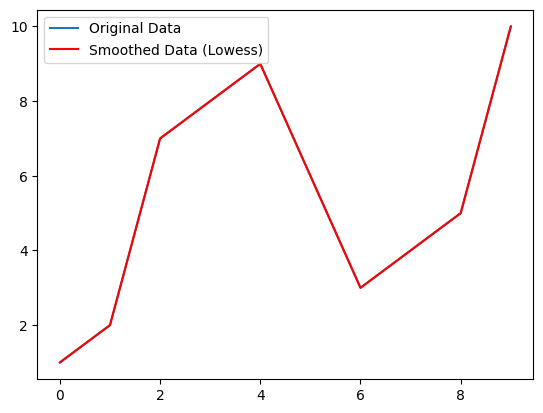

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[ 1.  2.  7.  8.  9.  6.  3.  4.  5. 10.]


In [37]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
x = np.arange(len(data))
smoothed_data = lowess(data, x, frac=0.3)[:, 1]

# Plotting
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Lowess)', color='red')
plt.legend()
plt.show()

print(data)
print(smoothed_data)

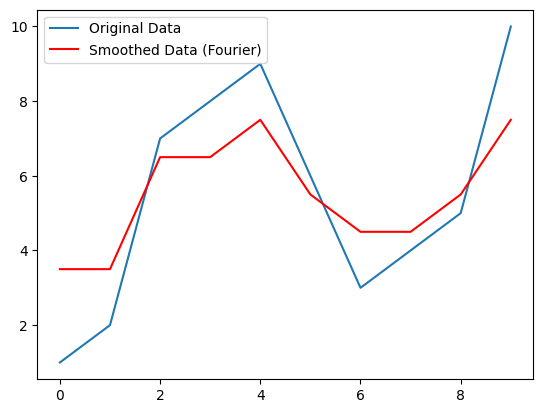

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[3.5 3.5 6.5 6.5 7.5 5.5 4.5 4.5 5.5 7.5]


In [38]:
from numpy.fft import fft, ifft

def fourier_smoothing(data, threshold):
    # Perform Fourier Transform
    freq_data = fft(data)
    # Zero out frequencies above the threshold
    freq_data[threshold:] = 0
    smoothed_data = np.real(ifft(freq_data))
    return smoothed_data

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
smoothed_data = fourier_smoothing(data, threshold=5)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Fourier)', color='red')
plt.legend()
plt.show()

print(data)
print(smoothed_data)


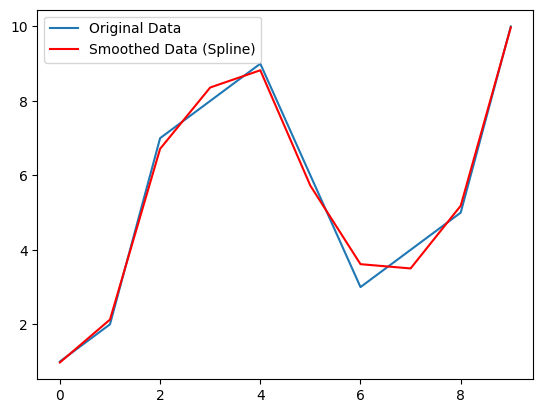

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[0.97514619 2.12773516 6.71336088 8.3612189  8.82372599 5.72246476
 3.61542366 3.50097141 5.18426071 9.97569235]


In [39]:
from scipy.interpolate import UnivariateSpline

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
x = np.arange(len(data))
spline = UnivariateSpline(x, data, s=1)  # s is the smoothing factor
smoothed_data = spline(x)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Spline)', color='red')
plt.legend()
plt.show()

print(data)
print(smoothed_data)


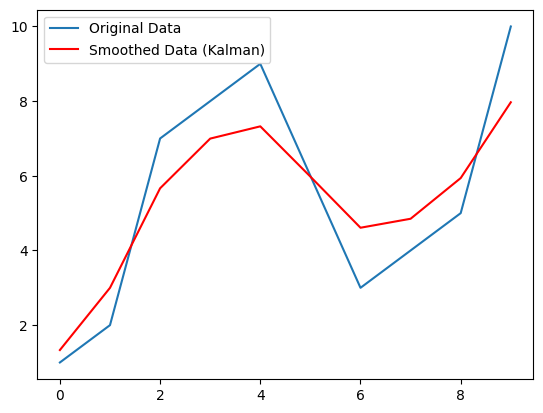

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[[1.33318107]
 [2.99954321]
 [5.66544857]
 [6.99680248]
 [7.32495889]
 [5.97807418]
 [4.60926366]
 [4.84971679]
 [5.93988672]
 [7.96994336]]


In [40]:
import numpy as np
from pykalman import KalmanFilter

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
smoothed_data, _ = kf.smooth(data)

# Plotting
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Kalman)', color='red')
plt.legend()
plt.show()


print(data)
print(smoothed_data)

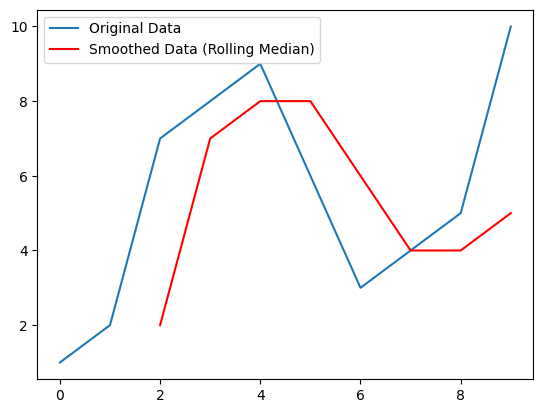

[1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
[[1.33318107]
 [2.99954321]
 [5.66544857]
 [6.99680248]
 [7.32495889]
 [5.97807418]
 [4.60926366]
 [4.84971679]
 [5.93988672]
 [7.96994336]]


In [41]:
import pandas as pd

# Example data
data = [1, 2, 7, 8, 9, 6, 3, 4, 5, 10]
rolling_median = pd.Series(data).rolling(window=3).median()

# Plotting
plt.plot(data, label='Original Data')
plt.plot(rolling_median, label='Smoothed Data (Rolling Median)', color='red')
plt.legend()
plt.show()

print(data)
print(smoothed_data)